In [3]:
%matplotlib.inline
import matplotlib
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 144

UsageError: Line magic function `%matplotlib.inline` not found.


### Basic data tools: NumPy, Matplotlib, Pandas

Python is a powerful and flexible pl, but it doesn't have built-in tools for mathematical analysis or data visualization. For most data analysis we will rely on some helpful libraries. We'll explore three libraries that arevery common for data analysis and visualization.

### Numpy

First among these is NumPy. The main NumPy features are three-fold: its mathematical functions (e.g sin, log, floor), its random submodule(useful for random sampling), and the NumPy ndarray object.

A Numpy array is similar to a mathematical n-dimensional matrix

A NumPy array could be 1-dimensional e.g [1, 5, 20, 34,...], 2-dimentional, or many dimensions. It's important to note that all the rows and columns of the 2-dimensional array are the same length. That will be true for all dimension of arrays.

Let's contrast this with lists.

In [10]:
built = range(1, 5)
built

range(1, 5)

In [2]:
import numpy as np
np_pack = np.arange(1, 5)
np_pack

array([1, 2, 3, 4])

In [20]:
list_of_lists = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
list_of_lists

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]

In [21]:
an_array = np.array(list_of_lists)
print(an_array)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [15]:
type(an_array)

numpy.ndarray

In [16]:
non_rectangular = [[1, 2], [3, 4, 5], [6, 7, 8, 9]]
non_rectangular

[[1, 2], [3, 4, 5], [6, 7, 8, 9]]

In [19]:
non_rectangular_array = np.array(non_rectangular, dtype=object)
non_rectangular_array

array([list([1, 2]), list([3, 4, 5]), list([6, 7, 8, 9])], dtype=object)

note : numpy array must be rectangular

why did these print differently? Let's investigate their shape and data type(dtype)

In [20]:
print(an_array.shape, an_array.dtype)
print(non_rectangular_array.shape, non_rectangular_array.dtype)

(3, 3) int32
(3,) object


In [ ]:
The first case, an_array, is a 2-dimensional 3x3 array(of integers). In contrast,

In [21]:
np.array(['a', 0, False, 2.59]).dtype

dtype('<U32')

We can also createa variety ofarrays withNumPy convenient functions

In [2]:
np.linspace(0, 10, 5)

array([ 0. ,  2.5,  5. ,  7.5, 10. ])

In [3]:
np.arange(1, 10, 2)

array([1, 3, 5, 7, 9])

In [4]:
np.array(range(1, 10))

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [5]:
np.logspace(1,10,3)

array([1.00000000e+01, 3.16227766e+05, 1.00000000e+10])

In [8]:
np.zeros((5, 10))

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [9]:
np.diag((1, 1, 3, 5))

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 5]])

In [11]:
np.eye(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

We can also convert the dtype of an an array after creation

In [4]:
print(np.logspace(1, 10, 10))
print('----------------------')
print(np.logspace(1, 10, 10).astype(int))

[1.e+01 1.e+02 1.e+03 1.e+04 1.e+05 1.e+06 1.e+07 1.e+08 1.e+09 1.e+10]
----------------------
[         10         100        1000       10000      100000     1000000
    10000000   100000000  1000000000 -2147483648]


In [5]:
np.array([False, True]).astype(float)

array([0., 1.])

Why does this matter?

Arrays are often more efficient in terms of code as well as computational resources for certain calcilations. Computatinally this efficienciency comes from the fact that we pre-allocate a contiguous block of memory for the results of our computation.

To explore the advantages in code, let's try to do some math on these numbers

First let's simply calculate the sum of all numbers and look at the differences in the necessarycode for list_of_lists, an_array, and non_rectangular_array

In [22]:
print(sum([sum(inner_list) for inner_list in list_of_lists]))
print(an_array.sum())

45
45


for column sum

In [23]:
[sum(inner_list) for inner_list in list_of_lists]

[6, 15, 24]

In [24]:
an_array.sum(1)

array([ 6, 15, 24])

for row sum

In [25]:
an_array.sum(axis=0)

array([12, 15, 18])

In [26]:
[sum(row[index] for row in list_of_lists) for index in range(len(list_of_lists[0]))]

[12, 15, 18]

Summing the numbers in an array is much easier than for a list of lists. We don't have to dig into hierarchy of lists, we just use the sum method of the ndarray. Does this still work for non_rectangular_array?

These restrictions around shape and dtype allow the ndarray obects to be much more performant compared to a general Python list. Thereare few reasons for this, but the main two result from the typed nature of the ndarray, as this allows contiguous memory storage and consistent function lookup. When a Python list is summed, Python needs to figure out at runtime the correct way in which to add each element of the list together. When an ndarray is summed, Numpy already knows the type of the each element (and they are consistent), thus it can sum them without checking the correct add function for each element.

Lets see this in action by doing some basic profiling. First we will create a list of 100000 random elements and then time the sum function

In [6]:
time_list = [np.random.random() for _ in range(100000)]
time_arr = np.array(time_list)

In [16]:
%%timeit
sum(time_list)

908 µs ± 26.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [19]:
%%timeit
sum(time_arr)

17.3 ms ± 1.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Changing Shape

Often we will want to take arrays that are one shape and transform them to a different shape more amenable to a specific operation

In [29]:
print(an_array)
an_array[1,1] = 10
print(an_array)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[ 1  2  3]
 [ 4 10  6]
 [ 7  8  9]]


In [30]:
an_array.shape

(3, 3)

In [32]:
an_array.reshape(1, -1)

array([[ 1,  2,  3,  4, 10,  6,  7,  8,  9]])

In [39]:
mat = np.random.rand(10,5)

In [40]:
mat.reshape(5,10)

array([[0.88679371, 0.92670428, 0.40148968, 0.27351752, 0.37689472,
        0.33267827, 0.34873051, 0.30195613, 0.28672756, 0.03482674],
       [0.25143191, 0.92146676, 0.06173012, 0.13581623, 0.03005625,
        0.87949649, 0.18252262, 0.98259507, 0.08438482, 0.996131  ],
       [0.70147942, 0.47879832, 0.61748174, 0.7304118 , 0.14567637,
        0.96404905, 0.49134321, 0.45826843, 0.6216211 , 0.57108513],
       [0.33121433, 0.16917143, 0.22553174, 0.83492356, 0.34122645,
        0.25295881, 0.22929338, 0.02205698, 0.63607601, 0.17432542],
       [0.4449392 , 0.82378381, 0.35837755, 0.05888651, 0.79913351,
        0.51037593, 0.15526775, 0.66099902, 0.93244969, 0.56434989]])

In [42]:
# ravel() unravels the array into one dimension
mat.ravel()

array([0.88679371, 0.92670428, 0.40148968, 0.27351752, 0.37689472,
       0.33267827, 0.34873051, 0.30195613, 0.28672756, 0.03482674,
       0.25143191, 0.92146676, 0.06173012, 0.13581623, 0.03005625,
       0.87949649, 0.18252262, 0.98259507, 0.08438482, 0.996131  ,
       0.70147942, 0.47879832, 0.61748174, 0.7304118 , 0.14567637,
       0.96404905, 0.49134321, 0.45826843, 0.6216211 , 0.57108513,
       0.33121433, 0.16917143, 0.22553174, 0.83492356, 0.34122645,
       0.25295881, 0.22929338, 0.02205698, 0.63607601, 0.17432542,
       0.4449392 , 0.82378381, 0.35837755, 0.05888651, 0.79913351,
       0.51037593, 0.15526775, 0.66099902, 0.93244969, 0.56434989])

In [46]:
a  = [1, 2, 3, 4, 5]
b = [2, 3, 4, 5, 6]

np.hstack((b, a))

array([2, 3, 4, 5, 6, 1, 2, 3, 4, 5])

In [49]:
np.vstack((a, b))

array([[1, 2, 3, 4, 5],
       [2, 3, 4, 5, 6]])

### Matplotlib

Matplotlib is the most popular Python plotting library. It allows us to visualize data quickly by providing a variety of types of graphs (e.g bar, scatter, line, etc). It also provides useful tools for arranging multiple images or image components within a figure, enabling us to build up more complex visualizations as we need to.

Let's visualize some data! In the next cells, we'll generate some data.

In [80]:
np.random.choice(['win', 'lose', 'draw'])

'win'

In [77]:
# Generate a uniform random sample from np.arange(5) of size 3:

np.random.choice()


TypeError: choice() takes at least 1 positional argument (0 given)

In [76]:
np.random.choice?

In [72]:
np.random.random()

0.3304574089625303

In [53]:
# an exanple
np.random.rand(3), np.random.rand()

(array([0.5493742 , 0.32040812, 0.61304779]), 0.29025684624169346)

In [82]:
np.arange(5) * 2

array([0, 2, 4, 6, 8])

In [89]:
np.random.rand()

0.8689573427548362

In [103]:
import matplotlib.pyplot as plt


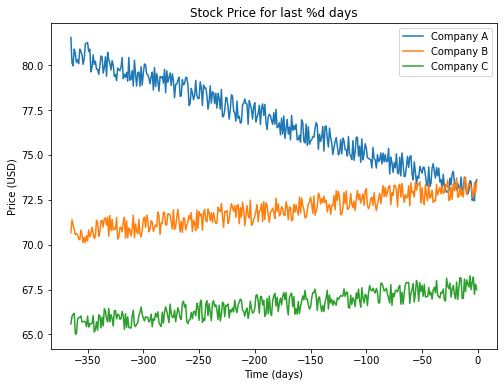

In [122]:
def gen_stock_price(days, initial_price):
    
    # stock price grows or shrinks linearly
    # not exceeding 10% (heuristic)
    trend = initial_price * (np.arange(days) * .1 / 365 * np.random.rand() * np.random.choice([-1, 1]) + 1)
    
    # noise wil be about 2%
    noise = .02 * np.random.rand(len(trend)) * trend
    
    return noise + trend


days = 365
initial_prices = [80, 70, 65]
for price in initial_prices:
    plt.plot(np.arange(-days,0), gen_stock_price(days, price))
plt.title("Stock Price for last %d days".format(days))
plt.xlabel("Time (days)")
plt.ylabel("Price (USD)")
plt.legend(['Company A', 'Company B', 'Company C'])
plt.rcParams["figure.figsize"] = [8, 6]
             
    

In [10]:
import numpy as np

def gen_football_team(n_players, mean_shoe, mean_jersey):
    shoe_sizes = np.random.normal(size=n_players, loc=mean_shoe, scale=.15 * mean_shoe)
    jeysey_sizes = mean_jersey / mean_shoe * shoe_sizes + np.random.normal(size=n_players, scale=.05 * mean_jersey)
    
    return shoe_sizes, jeysey_sizes

shoes, jerseys = gen_football_team(16, 11, 100)
    

## Pandas

The Pandas package introduces a very powerful tool for working with data in Python: the DataFrame. A DataFrame is a table. Each column represents a different type of data (sometimes called a field). The columns are named, so I could have a column called 'shoe_size' and a column called 'jersey_size'. I don't have to remember which column is which, because I can refer to them by name. Each row represents a different record or entity (e.g player). I can also name the rows, so instead of remembering which row in my array corresponds with Ronaldinho, I can name the row 'Ronaldinhpo' and look up his shoe size and jersey size name.

In [15]:
import pandas as pd

players = ['Ronaldinho', 'Pele', 'Lionel Messi', 'Zinedine Zidane', 'Didier Drogba', 'Ronaldo', 'Yaya Toure', 
           'Frank Rijkaard', 'Diego Maradona', 'Mohamed Aboutrika', 'Samuel Eto o', 'George Best', 'Roberto Donadoni']
shoes, jeyseys = gen_football_team(len(players), 10, 100)

df = pd.DataFrame({'shoe_size' : shoes, 'jersey_size' : jeyseys}, index=players)

df

,shoe_size,jersey_size
Ronaldinho,9.498985,95.988057
Pele,11.073338,110.731366
Lionel Messi,8.298956,81.789052
Zinedine Zidane,12.687865,123.271282
Didier Drogba,10.377181,99.251921
Ronaldo,9.027864,85.410174
Yaya Toure,9.271647,97.088360
Frank Rijkaard,9.398316,83.643160
Diego Maradona,9.339760,95.158178
Mohamed Aboutrika,13.047011,135.838572


In [17]:
len(shoes), len(jerseys), len(players)

(13, 16, 13)

In [18]:
# We can also make dataframe using zip

df = pd.DataFrame(list(zip(shoes, jerseys)), columns = ['shoe_size', 'jersey_size'], index=players)

df

,shoe_size,jersey_size
Ronaldinho,9.498985,91.444810
Pele,11.073338,67.811026
Lionel Messi,8.298956,121.447830
Zinedine Zidane,12.687865,101.913089
Didier Drogba,10.377181,94.044103
Ronaldo,9.027864,108.959574
Yaya Toure,9.271647,97.144083
Frank Rijkaard,9.398316,87.321159
Diego Maradona,9.339760,92.873448
Mohamed Aboutrika,13.047011,108.965523


The DataFrame has similarities to both dict and a Numpy ndarray. For exaample, we can retrieve a column from the DataFrame by using its name, just like we would retrieve an item from a dict using its key.

In [20]:
print(df['shoe_size'])

Ronaldinho            9.498985
Pele                 11.073338
Lionel Messi          8.298956
Zinedine Zidane      12.687865
Didier Drogba        10.377181
Ronaldo               9.027864
Yaya Toure            9.271647
Frank Rijkaard        9.398316
Diego Maradona        9.339760
Mohamed Aboutrika    13.047011
Samuel Eto o          9.234434
George Best           9.119433
Roberto Donadoni     11.800664
Name: shoe_size, dtype: float64


In [23]:
type(df['shoe_size'])

pandas.core.series.Series

And we can easily apply functions to the DataFrame just like we would with a NumPy array

In [21]:
np.log(df)

,shoe_size,jersey_size
Ronaldinho,2.251185,4.515736
Pele,2.404540,4.216725
Lionel Messi,2.116130,4.799485
Zinedine Zidane,2.540646,4.624120
Didier Drogba,2.339609,4.543764
Ronaldo,2.200316,4.690977
Yaya Toure,2.226961,4.576195
Frank Rijkaard,2.240531,4.469593
Diego Maradona,2.234281,4.531238
Mohamed Aboutrika,2.568559,4.691032


In [22]:
df.mean()

shoe_size      10.167343
jersey_size    98.673572
dtype: float64

We'll explore applying functions and analysing data in a DataFrame in more depth later on. First we need to know how to retrieve, add, and remove data from a DataFrame.

We've already seen how to retriee a column, what about retrieving a row? The most flexible syntax to use iis the DataFrame's loc method

In [32]:
df.loc[['Ronaldo'], 'shoe_size']

Ronaldo    9.027864
Name: shoe_size, dtype: float64

In [37]:
# can also select position-based slices of data
df.loc['Ronaldo':'George Best', 'shoe_size']

Ronaldo               9.027864
Yaya Toure            9.271647
Frank Rijkaard        9.398316
Diego Maradona        9.339760
Mohamed Aboutrika    13.047011
Samuel Eto o          9.234434
George Best           9.119433
Name: shoe_size, dtype: float64

In [38]:
# for position-based indexing, we will typically use iloc
print(df.iloc[:5])

                 shoe_size  jersey_size
Ronaldinho        9.498985    91.444810
Pele             11.073338    67.811026
Lionel Messi      8.298956   121.447830
Zinedine Zidane  12.687865   101.913089
Didier Drogba    10.377181    94.044103


Just as with a dict, we can add to our DataFrame by simply using the same syntax as we would use to retrieve data, but matching it with an assignment

In [41]:
# adding a new column
df['position'] = np.random.choice(['goalkeeper', 'defense', 'midfield', 'attack'], size=len(df))
df.head()

,shoe_size,jersey_size,position
Ronaldinho,9.498985,91.444810,defense
Pele,11.073338,67.811026,defense
Lionel Messi,8.298956,121.447830,midfield
Zinedine Zidane,12.687865,101.913089,defense
Didier Drogba,10.377181,94.044103,goalkeeper


In [42]:
# adding a row
df.loc['dylan'] = {'jersey_size': 91, 'shoe_size':9, 'position': 'midfielder'}
df.loc['dylan']

shoe_size             9.0
jersey_size          91.0
position       midfielder
Name: dylan, dtype: object

To delete data, we can use the DataFrame's drop method

In [43]:
df = df.drop('dylan')
df.index

Index(['Ronaldinho', 'Pele', 'Lionel Messi', 'Zinedine Zidane',
       'Didier Drogba', 'Ronaldo', 'Yaya Toure', 'Frank Rijkaard',
       'Diego Maradona', 'Mohamed Aboutrika', 'Samuel Eto o', 'George Best',
       'Roberto Donadoni'],
      dtype='object')

In order to make the change permanent,we either need to reassign df to the copy returned df.drop() or we have to use the keyword INPLACE